In [1]:
from markov_chain import inverse_square
from experiments import get_coverage_probability_ssrw
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Prepare style for the plots
sns.set_style("whitegrid")
sns.set_context("paper")

In [3]:
# Random seed for reproducibility
random_seed = 2024
np.random.seed(random_seed)

In [4]:
# Variables
n_bootstraps = 10**3  # Number of bootstraps to perform

n_reps = 10**4  # Number of times we will repeat the experiment (in order to obtain the coverage probability)

n_points = 10

min_n = 10**2

max_n = 10**6

true_mean = (np.pi**2)/3

confidence_level = 0.95

In [5]:
# 50 Log space integers, from 10^2 to 10^5
sizes = np.round(np.logspace(np.log10(min_n), np.log10(max_n), n_points)).astype(int)

In [6]:
sizes

array([    100,     278,     774,    2154,    5995,   16681,   46416,
        129155,  359381, 1000000])

In [7]:
data_1 = list()
import time

for n_steps in sizes:
    print(n_steps)
    random_seed += 1
    start_time = time.time()
    data_1.append(get_coverage_probability_ssrw(n_steps=n_steps, fn=inverse_square, n_reps=n_reps, n_bootstraps=n_bootstraps, true_mean=true_mean, random_seed=random_seed, confidence_level=confidence_level))
    end_time = time.time()
    print(f"Time taken for n_steps={n_steps}: {end_time - start_time} seconds")


100
The coverage probability for the RBB is 0.5329. The average length is 2.6946799718264955
The coverage probability for the regeneration based bootstrap is 0.4862. The average length is 2.6160226027111197
The coverage probability using the IID data is 0.5758. The average length is 3.1980379767815843
Time taken for n_steps=100: 45.707159757614136 seconds
278
The coverage probability for the RBB is 0.6331. The average length is 2.800306585953139
The coverage probability for the regeneration based bootstrap is 0.5941. The average length is 2.743723942643536
The coverage probability using the IID data is 0.6625. The average length is 3.177697191045415
Time taken for n_steps=278: 57.95773410797119 seconds
774
The coverage probability for the RBB is 0.7161. The average length is 2.659048144759478
The coverage probability for the regeneration based bootstrap is 0.6785. The average length is 2.624104716964053
The coverage probability using the IID data is 0.734. The average length is 2.92850

In [8]:
rbb_cov_probs = [x[0]['cov_prob'] for x in data_1]
regeneration_based_cov_probs = [x[1]['cov_prob'] for x in data_1]
iid_cov_probs = [x[2]['cov_prob'] for x in data_1]

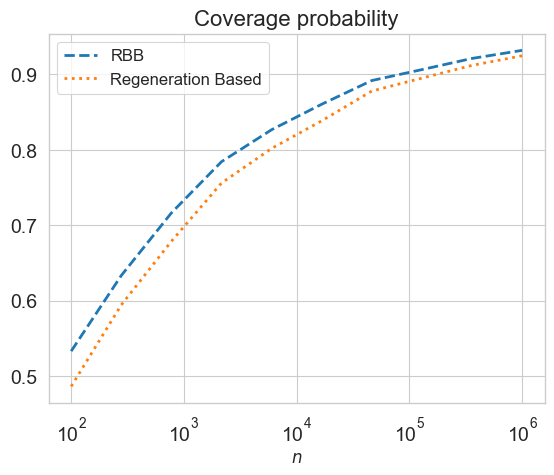

In [9]:
plt.plot(sizes, rbb_cov_probs, label='RBB', linestyle='--', linewidth=2)
plt.plot(sizes, regeneration_based_cov_probs, label='Regeneration Based', linestyle=':', linewidth=2)
# plt.plot(sizes, iid_cov_probs, label='IID')
plt.xscale('log')
plt.xlabel(r"$n$", fontsize=12)
plt.title("Coverage probability", fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [10]:
rbb_avg_length = [x[0]['avg_length'] for x in data_1]
regeneration_based_avg_length = [x[1]['avg_length'] for x in data_1]
iid_avg_length = [x[2]['avg_length'] for x in data_1]

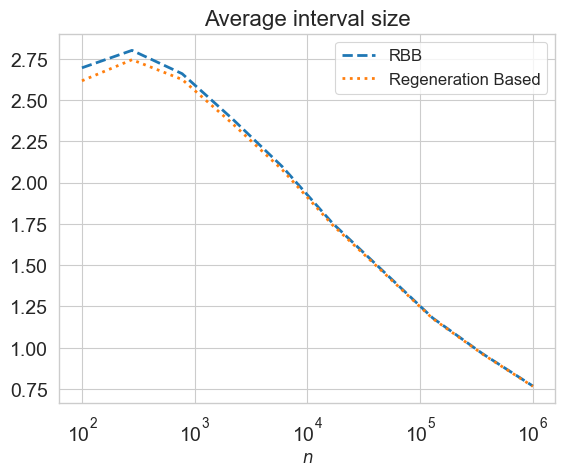

In [11]:
plt.plot(sizes, rbb_avg_length, label='RBB', linestyle='--', linewidth=2)
plt.plot(sizes, regeneration_based_avg_length, label='Regeneration Based', linestyle=':', linewidth=2)
# plt.plot(sizes, iid_avg_length, label='IID')
plt.xscale('log')
plt.xlabel(r"$n$", fontsize=12)
plt.title("Average interval size", fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()